# Introduction

## The Business Problem

Our client is a credit card company. 

**Goal: Develop a predictive model for whether an account will default next month, given demographics and historical variables (explanatory variables) for each observation account ID.**


## Dataset 

- Collected in 2005 within April-August.


- **Variables/Columns (25):** demographic and recent (past 6 months: August to April) financial variables for each credit account ID.


- **Observation/Rows (30,000):** credit account IDS.


Rows are labeled (i.e. by the "default payment next month" column) by whether, in the next month after the 6-month historical data period, an account owner has defaulted (i.e. failed to make the minimum payment) --> **object/test variable/response variable**

In [1]:
import pandas as pd

df = pd.read_excel("Data/CreditCards.xls")

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##  Data dictionary 

### Variables overview


### Indexing:


- **ID:** credit account IDS.


### Explanatory variables:


- **LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.


- **SEX:** (1 = male; 2 = female).


- **EDUCATION:** (1 = graduate school; 2 = university; 3 = high school; 4 = others).


- **MARRIAGE:** (1 = married; 2 = single; 3 = others).


- **AGE:** (year).


- **PAY_1-PAY_6:** History of the past monthly repayment(Rimborsi, quanto devi rimborsare) (PAY_1 = repayment status in September, PAY_2 = ... August, PAY_3 = ... July, Pay_4 = ... June, Pay_5 = ... May, PAY_6 = ... April). Measurement scale for each the repayment status (PAY_N): (-1 = pay duly(i.e. pay rigth); 1 = payment delay for 1 month; 2 = ... 2 months; up to 9 = payment delay for 9 months and above.).


- **BILL_AMT1–BILL_AMT6:** Monthly bill statement amount(Estratto conto, capitale utile mensile ) (BILL_AMT1 = Bill statement amount in September, BILL_AMT2 = ... August, BILL_AMT3 = ... July, BILL_AMT4 = ... June, BILL_AMT5 = ... May, BILL_AMT6 = ... April). Measurement scale for each bill statement amount (BILL_AMTN) : (NT dollar).


- **PAY_AMT1–PAY_AMT6:** Monthly previous payment amount (PAY_AMT1 = Bill statement amount in September, PAY_AMT2 = ... August, PAY_AMT3 = ... July, PAY_AMT4 = ... June, PAY_AMT5 = ... May, PAY_AMT6 = ... April). Measurement scale for each previous payment amount (PAY_AMTN) : (NT dollar).


### Response variable:


- **default payment next month:** (0 = No default, 1 = default).


### Goal

**Develop a predictive model for the response variable default payment next month for the credit account IDs given the explanatory variables.**

# EDA (Exploratory Data Analysis) and Cleaning

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

## ID 

In [4]:
df["ID"].nunique()


29687

### Duplicates 

In [5]:
id_counts = df["ID"].value_counts()
id_counts


ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: ID, Length: 29687, dtype: int64

In [6]:
id_counts.value_counts()


1    29374
2      313
Name: ID, dtype: int64

313 duplicates of size 2.

In [7]:
dupe_mask = id_counts == 2  # Boolean mask for identify the duplicates of size 2
print(dupe_mask[0:5])
print(id_counts[0:5])


ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64


In [8]:
dupe_ids = id_counts.index[dupe_mask]  # Storing duplicate indexes
dupe_ids = list(dupe_ids)

print(len(dupe_ids))
print(dupe_ids[0:5])


313
['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9']


In [9]:
df.loc[
    df["ID"].isin(dupe_ids[0:3]), :
]  # Masking with respect the first 3 duplicate IDs


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Our duplicates seems observations with all 0 for the variables.


"0 rows" are also invalid data since makes no sense LIMIT_BAL = 0,  AGE = 0, and so on.

In [10]:
df_zero_mask = df == 0  # Boolean mask for 0 rows.
df_zero_mask


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(
    axis=1
)  # For single output for each rows
feature_zero_mask


0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [12]:
sum(feature_zero_mask)  # Boolean sums are equal to the sum of Trues


315

315 0 rows.

In [13]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()
df_clean_1.shape


(29685, 25)

29685 valid IDs.

In [14]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [15]:
df_clean_1.to_csv("Data/df_clean_1.csv", index=False)  # Saving

# Check point

# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL
# SEX
# EDUCATION
# MARRIAGE
# AGE
# PAY_1-PAY_6
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month


# PAY_1-PAY_6

In [16]:
df_clean_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [17]:
df_clean_1["PAY_1"].value_counts()


0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

PAY_1 'Not available' value (for missing) drive the column to be an object type.

In [18]:
# For now I decide to remove this missing type.
valid_pay_1_mask = df_clean_1["PAY_1"] != "Not available"
valid_pay_1_mask


0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: PAY_1, Length: 29685, dtype: bool

In [19]:
sum(valid_pay_1_mask)


26664

26664 valid rows.

In [20]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()
df_clean_2["PAY_1"].value_counts()


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [21]:
# Now that the features are consistent int64 type.
df_clean_2["PAY_1"] = df_clean_2["PAY_1"].astype("int64")
df_clean_2[["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
 2   PAY_3   26664 non-null  int64
 3   PAY_4   26664 non-null  int64
 4   PAY_5   26664 non-null  int64
 5   PAY_6   26664 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [22]:
df_clean_2["PAY_1"].value_counts()


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Undocumented values of –2 and 0 in PAY_1.

Learned from the company:

- -2 means the account started that month with a zero balance and never used
any credit.

- 0 means that at least the minimum payment was made, but the entire balance
wasn't paid (that is, a positive balance was carried to the next month).

In [23]:
df_clean_2.to_csv("Data/df_clean_2.csv", index=False)  # saving

# Check point
# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL
# SEX
# EDUCATION
# MARRIAGE
# AGE
# PAY_1-PAY_6 -> Adjustment Pay_1 type + drop of the missing ("not avaible")
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month


# LIMIT_BAL


In [24]:
import matplotlib.pyplot as plt # plotting package
# Plot direct under the cells
%matplotlib inline
import matplotlib as mpl # additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 # high resolution figures

<AxesSubplot:>

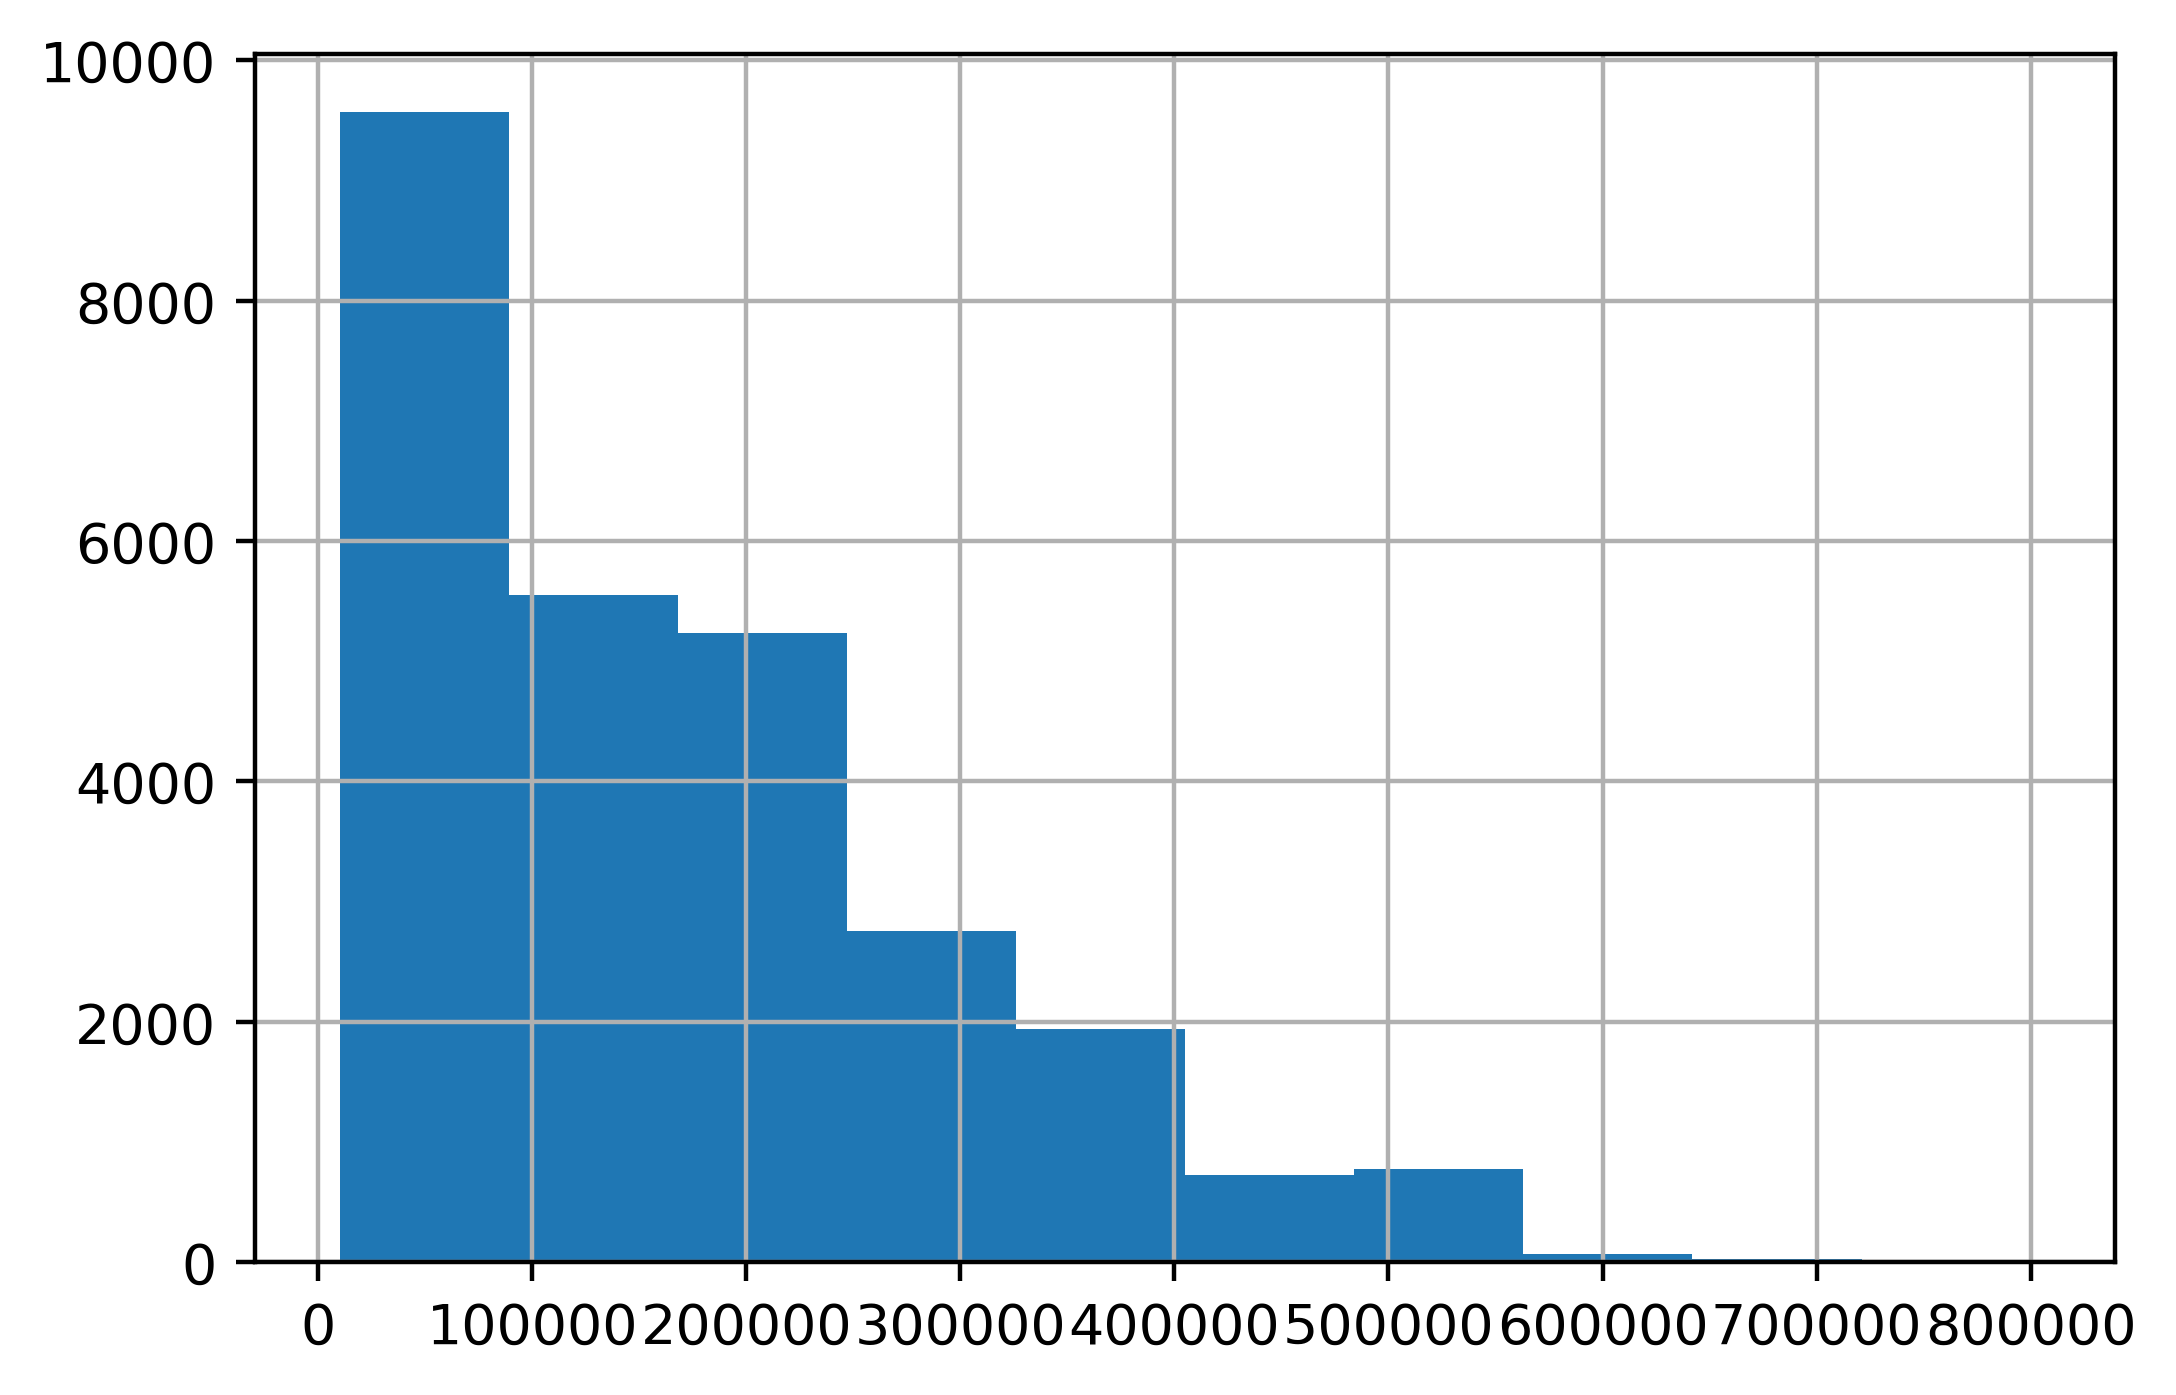

In [25]:
df_clean_2["LIMIT_BAL"].hist()


In [26]:
df_clean_2["LIMIT_BAL"].describe()


count     26664.000000
mean     167919.054905
std      129839.453081
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

'LIMIT_BAL' seems fine since all the all the values are above 0 (min = 10000, no invalid data).

No strange patterns in the hist.

# AGE 

<AxesSubplot:>

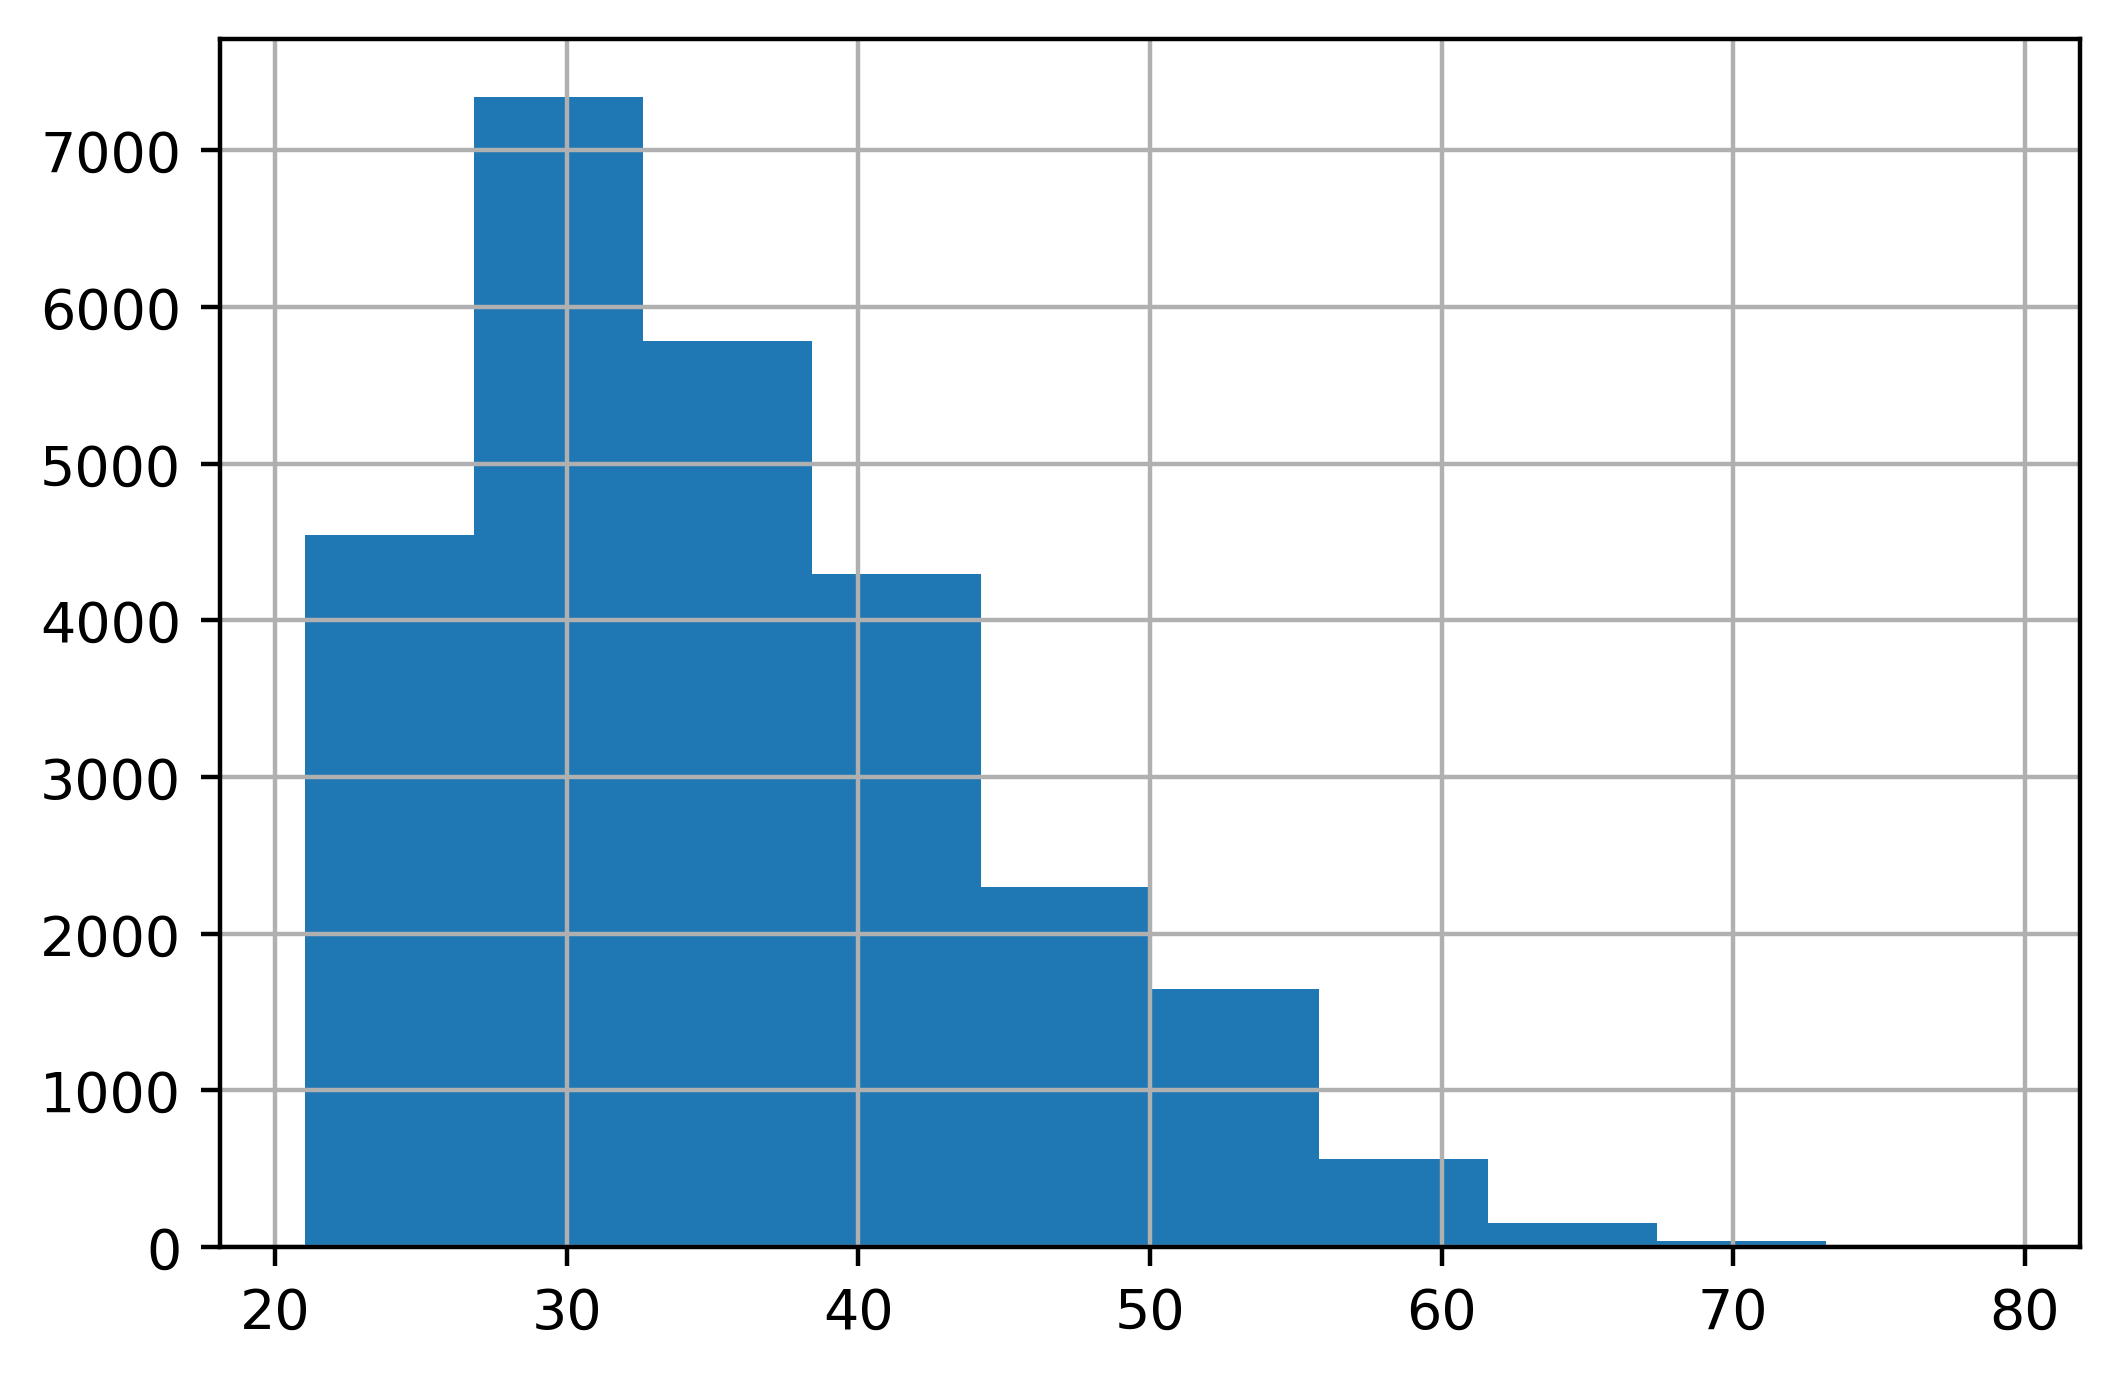

In [27]:
df_clean_2["AGE"].hist()


In [28]:
df_clean_2["AGE"].describe()


count    26664.000000
mean        35.505213
std          9.227442
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

'AGE' seems fine (min = 21, no strange patterns in the hist)

# SEX

In [29]:
df_clean_2["SEX"].value_counts()


2    16080
1    10584
Name: SEX, dtype: int64

No undocumented, values.

# EDUCATION

In [30]:
df_clean_2["EDUCATION"].value_counts()


2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

0, 5, 6 undocumented values.

Since '4 = others' and the counts for '0, 5, 6' are low I merge them with '4 = others'.

In [31]:
df_clean_2["EDUCATION"].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2["EDUCATION"].value_counts()


2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

# MARRIAGE

In [32]:
df_clean_2["MARRIAGE"].value_counts()


2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

'0 undocumented value', since low count I merge it with '3 = others'.

In [33]:
df_clean_2["MARRIAGE"].replace(to_replace=0, value=3, inplace=True)
df_clean_2["MARRIAGE"].value_counts()


2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [34]:
df_clean_2.to_csv("Data/df_clean_2_01.csv", index=False)  # saving

# Check point
# ID -> removal of duplicate and invalid IDs (observations)
# LIMIT_BAL -> fine
# SEX -> fine
# EDUCATION -> merge undocumented categories('0, 5, 6' to --> '4 = others')
# MARRIAGE -> merge undocumented categories('0' to --> '3 = others')
# AGE -> fine
# PAY_1-PAY_6 -> Adjustment Pay_1 type + drop of the missing ("not avaible")
# BILL_AMT1-BILL_AMT6
# PAY_AMT1-PAY_AMT6
# default payment next month
